In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
os.chdir("/content/drive/Shareddrives/機器學習/AOI data") #這邊輸入欲使用的資料夾路徑
os.getcwd()

'/content/drive/Shareddrives/機器學習/AOI data'

In [3]:
!pip install mahotas

     |████████████████████████████████| 5.7 MB 4.6 MB/s 


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn import preprocessing
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split
from sklearn import metrics
import random
import cv2
import seaborn as sns
import mahotas
import glob
import argparse
from sklearn import svm
import sklearn.model_selection as model_selection
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris

In [6]:
train = pd.read_csv("AOI_train.csv")
train.head()

,ID,Label
0,train_00000.png,0
1,train_00001.png,1
2,train_00002.png,1
3,train_00003.png,5
4,train_00004.png,5


In [7]:
data_path = "AOI_Train_Image" #路徑掛載到存放圖片的資料夾路徑

image shape: (512, 512, 3)
data type: uint8
min: 77, max: 255


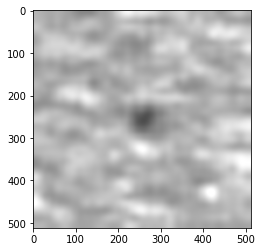

In [8]:
# 挑選一張切割前的原圖
img = cv2.imread(os.path.join(data_path, train.loc[320, "ID"]))
print(f"image shape: {img.shape}")
print(f"data type: {img.dtype}")
print(f"min: {img.min()}, max: {img.max()}")
plt.imshow(img)
plt.show()

In [9]:
# 設置切割參數
crop = []
point = [0, 171, 342, 512]
for i in range(3):
  for j in range(3):
    crop.append([point[i]]+[point[i+1]]+[point[j]]+[point[j+1]])
crop

[[0, 171, 0, 171],
 [0, 171, 171, 342],
 [0, 171, 342, 512],
 [171, 342, 0, 171],
 [171, 342, 171, 342],
 [171, 342, 342, 512],
 [342, 512, 0, 171],
 [342, 512, 171, 342],
 [342, 512, 342, 512]]

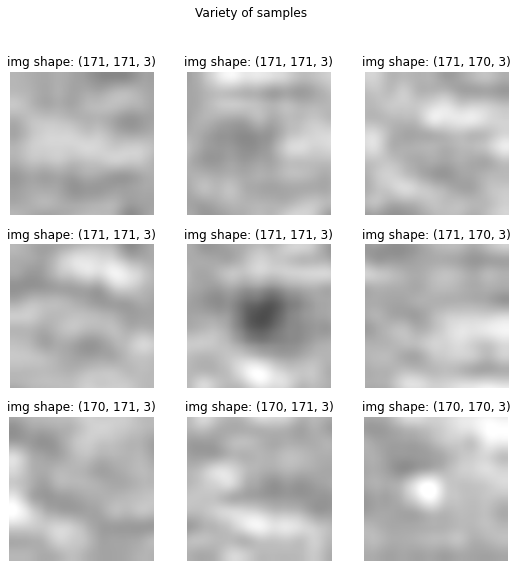

In [10]:
# 切割成3*3個子圖的效果
plt.figure(figsize=(9,9))
for i in range(9):
    plt.subplot(3, 3, i+1)
    img = cv2.imread(os.path.join(data_path, train.loc[320, "ID"]))[crop[i][0]:crop[i][1], crop[i][2]:crop[i][3]]
    plt.imshow(img,cmap='gray')
    plt.axis("off")
    plt.title(f"img shape: {img.shape}")
plt.suptitle(f"Variety of samples", fontsize=12)
plt.show()

In [11]:
import statistics
a=img.reshape(-1)

In [12]:
# 將3*3個子圖的特徵合併成一個dataframe
df_hara = pd.DataFrame()
for i in range(9):
  img = cv2.imread(os.path.join(data_path, train.loc[320,"ID"]))[crop[i][0]:crop[i][1], crop[i][2]:crop[i][3]]
  image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  df_hara = df_hara.append(list(mahotas.features.haralick(image)))

df_hara

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.006947,0.521362,0.999125,298.039056,0.770114,355.026625,1191.634860,6.989304,7.572459,0.002215,1.132195,-0.743886,0.999936
1,0.003834,1.816263,0.996947,297.469275,0.562211,355.174879,1188.060836,7.013335,8.422374,0.001519,1.763079,-0.602448,0.999649
2,0.004422,1.459512,0.997539,296.523078,0.602053,355.122257,1184.632800,7.002970,8.257225,0.001596,1.655010,-0.629352,0.999745
3,0.003796,1.823045,0.996936,297.473065,0.542328,355.174671,1188.069213,7.014834,8.396010,0.001513,1.727370,-0.606825,0.999667
0,0.005344,0.779842,0.998927,363.251704,0.708985,360.237221,1452.226974,7.206861,8.047010,0.001733,1.322011,-0.705525,0.999922
1,0.003321,2.383460,0.996686,359.552652,0.526106,360.037855,1435.827148,7.199639,8.777087,0.001248,1.908771,-0.586820,0.999659
2,0.003937,1.660303,0.997687,358.955751,0.589577,360.054799,1434.162701,7.202845,8.514701,0.001379,1.719217,-0.628804,0.999797
3,0.003269,2.165606,0.996989,359.557042,0.525604,360.039862,1436.062563,7.203938,8.725756,0.001234,1.853250,-0.595084,0.999692
0,0.004973,0.851933,0.998720,332.769934,0.694578,377.399564,1330.227801,7.164430,8.061443,0.001744,1.371879,-0.693891,0.999905
1,0.003338,2.154473,0.996760,332.471596,0.546018,377.517369,1327.731912,7.160024,8.693045,0.001276,1.875069,-0.591179,0.999661


In [13]:
# 3*3個子圖合併計算各個特徵的平均m(X0:X12)、變異v(X13:X25)、偏度s(X26:X38)、峰度k(X39:X51)，合併成一個row
# 也就是df_hara的column m,v,s,k
df_mvsk = pd.DataFrame()
df_mvsk = pd.concat([df_mvsk,df_hara.mean(axis = 0).to_frame().T],axis = 1)
df_mvsk = pd.concat([df_mvsk,df_hara.var(axis = 0).to_frame().T],axis = 1)
df_mvsk = pd.concat([df_mvsk,df_hara.skew(axis = 0).to_frame().T],axis = 1)
df_mvsk = pd.concat([df_mvsk,df_hara.kurt(axis = 0).to_frame().T],axis = 1)

df_mvsk

,0,1,2,3,4,5,6,7,8,9,...,3,4,5,6,7,8,9,10,11,12
0,0.00393,2.015412,0.997565,456.975263,0.582781,363.989754,1825.88564,7.261233,8.627569,0.001357,...,3.119984,-0.67941,0.072171,3.119729,3.130812,0.82222,0.769289,-0.472132,-0.615975,-0.569305


In [14]:
# 計算test圖片的3*3個子圖之特徵之特徵m,v,s,k

df_crop33 = pd.DataFrame()

test = [320,321,322]

#for i in range(len(train)):
for j in test:

  # 將3*3個子圖的特徵合併成一個dataframe
  df_hara = pd.DataFrame()
  for i in range(9):
    img = cv2.imread(os.path.join(data_path, train.loc[j,"ID"]))[crop[i][0]:crop[i][1], crop[i][2]:crop[i][3]]
    image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    df_hara = df_hara.append(list(mahotas.features.haralick(image)))

  # df_hara的column m,v,s,k
  df_mvsk = pd.DataFrame()
  df_mvsk = pd.concat([df_mvsk,df_hara.mean(axis = 0).to_frame().T],axis = 1)
  df_mvsk = pd.concat([df_mvsk,df_hara.var(axis = 0).to_frame().T],axis = 1)
  df_mvsk = pd.concat([df_mvsk,df_hara.skew(axis = 0).to_frame().T],axis = 1)
  df_mvsk = pd.concat([df_mvsk,df_hara.kurt(axis = 0).to_frame().T],axis = 1)

  # 一張照片的13*4個特徵為df_crop33的的一個row
  df_crop33 = pd.concat([df_crop33, df_mvsk])

df_crop33

,0,1,2,3,4,5,6,7,8,9,...,3,4,5,6,7,8,9,10,11,12
0,0.003930,2.015412,0.997565,456.975263,0.582781,363.989754,1825.885640,7.261233,8.627569,0.001357,...,3.119984,-0.679410,0.072171,3.119729,3.130812,0.822220,0.769289,-0.472132,-0.615975,-0.569305
0,0.002928,25.072702,0.868484,342.111138,0.233108,368.483008,1343.371850,6.309409,9.549766,0.000467,...,-1.537475,0.396805,-1.370252,-1.537365,-1.495691,-1.184875,-1.241778,-0.619570,-1.426337,-0.785360
0,0.002891,22.115003,0.740656,42.665826,0.231158,317.138647,148.548301,5.641648,8.888996,0.000566,...,-1.288525,-0.977428,-0.247622,-0.661434,-0.692943,-0.799101,-0.878806,-0.985481,-0.960446,-1.067468


In [15]:
# 計算所有圖片的3*3個子圖之特徵之特徵m,v,s,k

df_crop33 = pd.DataFrame()

for j in range(len(train)):

  # 將3*3個子圖的特徵合併成一個dataframe
  df_hara = pd.DataFrame()
  for i in range(9):
    img = cv2.imread(os.path.join(data_path, train.loc[j,"ID"]))[crop[i][0]:crop[i][1], crop[i][2]:crop[i][3]]
    image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    df_hara = df_hara.append(list(mahotas.features.haralick(image)))

  # df_hara的column m,v,s,k
  df_mvsk = pd.DataFrame()
  df_mvsk = pd.concat([df_mvsk,df_hara.mean(axis = 0).to_frame().T],axis = 1)
  df_mvsk = pd.concat([df_mvsk,df_hara.var(axis = 0).to_frame().T],axis = 1)
  df_mvsk = pd.concat([df_mvsk,df_hara.skew(axis = 0).to_frame().T],axis = 1)
  df_mvsk = pd.concat([df_mvsk,df_hara.kurt(axis = 0).to_frame().T],axis = 1)

  # 一張照片的13*4個特徵為df_crop33的的一個row
  df_crop33 = pd.concat([df_crop33, df_mvsk])

df_crop33

,0,1,2,3,4,5,6,7,8,9,...,3,4,5,6,7,8,9,10,11,12
0,0.000253,714.240083,0.046906,374.648683,0.048034,346.750105,784.354651,6.817529,12.357976,0.000069,...,-1.216576,0.646827,-1.616352,-0.108467,-0.470322,-1.004660,0.000000,-0.066291,-0.607436,-0.700972
0,0.000538,98.675781,0.886183,453.600358,0.134092,358.728231,1715.725653,7.308476,11.428359,0.000224,...,-0.854178,-0.749416,1.382752,-0.773415,-1.266899,-0.494153,-0.436528,-0.679741,-0.756062,-1.221716
0,0.005141,3.335835,0.984444,186.707195,0.484101,357.738247,743.492945,6.404336,8.253548,0.001185,...,-1.044956,-1.503057,1.502022,-1.044302,-1.588309,-1.238764,-0.682535,-1.301157,-0.778801,1.595713
0,0.003060,4.633496,0.996032,608.221036,0.449768,413.974278,2428.250648,7.437039,9.414174,0.000895,...,2.551946,-1.049733,-1.303645,2.554574,2.146413,-0.312513,-0.167631,-0.708698,-0.839840,-1.015483
0,0.003168,2.706771,0.996188,374.590417,0.518485,406.949486,1495.654897,7.189784,8.839807,0.001139,...,-1.171698,-0.961821,-1.309742,-1.172045,-0.905456,-0.502249,-0.789481,-1.108565,-1.743426,-0.446397
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,0.000838,72.441585,0.833823,389.359850,0.149634,350.973424,1484.997814,6.863165,10.813660,0.000281,...,-1.501997,-0.364677,-1.500054,-1.501877,-1.491220,-1.103531,0.736719,-0.585325,-0.837729,-0.331766
0,0.000377,394.458294,0.341731,324.739368,0.066705,332.156407,904.499179,6.747113,11.853496,0.000102,...,-1.052336,-0.355722,-1.084726,-1.046655,-1.066351,-0.132321,0.121211,-0.667780,-0.490556,-1.528938
0,0.000490,72.926193,0.927392,537.085067,0.145419,331.312073,2075.414073,7.488619,11.453309,0.000253,...,1.187281,-1.394209,1.450418,1.190779,-0.604319,-0.417217,-0.822299,-1.720638,-1.075834,-0.993171
0,0.001108,20.000958,0.968514,367.682782,0.251149,326.298685,1450.730172,7.184040,10.278628,0.000505,...,-1.308407,-1.821468,-0.911798,-1.312183,-1.075604,-0.365839,-0.157454,-1.826211,-1.071482,-0.459159


In [16]:
# column name
col_names = []
for i in range(52):
  col_names.append("X"+str(i))
df_crop33.columns = col_names
df_crop33

,X0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X42,X43,X44,X45,X46,X47,X48,X49,X50,X51
0,0.000253,714.240083,0.046906,374.648683,0.048034,346.750105,784.354651,6.817529,12.357976,0.000069,...,-1.216576,0.646827,-1.616352,-0.108467,-0.470322,-1.004660,0.000000,-0.066291,-0.607436,-0.700972
0,0.000538,98.675781,0.886183,453.600358,0.134092,358.728231,1715.725653,7.308476,11.428359,0.000224,...,-0.854178,-0.749416,1.382752,-0.773415,-1.266899,-0.494153,-0.436528,-0.679741,-0.756062,-1.221716
0,0.005141,3.335835,0.984444,186.707195,0.484101,357.738247,743.492945,6.404336,8.253548,0.001185,...,-1.044956,-1.503057,1.502022,-1.044302,-1.588309,-1.238764,-0.682535,-1.301157,-0.778801,1.595713
0,0.003060,4.633496,0.996032,608.221036,0.449768,413.974278,2428.250648,7.437039,9.414174,0.000895,...,2.551946,-1.049733,-1.303645,2.554574,2.146413,-0.312513,-0.167631,-0.708698,-0.839840,-1.015483
0,0.003168,2.706771,0.996188,374.590417,0.518485,406.949486,1495.654897,7.189784,8.839807,0.001139,...,-1.171698,-0.961821,-1.309742,-1.172045,-0.905456,-0.502249,-0.789481,-1.108565,-1.743426,-0.446397
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,0.000838,72.441585,0.833823,389.359850,0.149634,350.973424,1484.997814,6.863165,10.813660,0.000281,...,-1.501997,-0.364677,-1.500054,-1.501877,-1.491220,-1.103531,0.736719,-0.585325,-0.837729,-0.331766
0,0.000377,394.458294,0.341731,324.739368,0.066705,332.156407,904.499179,6.747113,11.853496,0.000102,...,-1.052336,-0.355722,-1.084726,-1.046655,-1.066351,-0.132321,0.121211,-0.667780,-0.490556,-1.528938
0,0.000490,72.926193,0.927392,537.085067,0.145419,331.312073,2075.414073,7.488619,11.453309,0.000253,...,1.187281,-1.394209,1.450418,1.190779,-0.604319,-0.417217,-0.822299,-1.720638,-1.075834,-0.993171
0,0.001108,20.000958,0.968514,367.682782,0.251149,326.298685,1450.730172,7.184040,10.278628,0.000505,...,-1.308407,-1.821468,-0.911798,-1.312183,-1.075604,-0.365839,-0.157454,-1.826211,-1.071482,-0.459159


In [17]:
# csv output
df_crop33_output = df_crop33.copy()

df_crop33_output.index = train["Label"].index
df_crop33_output = pd.concat([df_crop33_output,train["Label"]],axis = 1)
df_crop33_output

df_crop33_output.to_csv("/content/drive/Shareddrives/機器學習/第三次討論/crop csv/crop3x3.csv")